In [2]:
from diffusers import StableDiffusionControlNetInpaintPipeline, ControlNetModel, UniPCMultistepScheduler
from diffusers.pipelines.controlnet.pipeline_controlnet_inpaint import *
from diffusers.utils import load_image

import cv2
from PIL import Image
import numpy as np
import torch
from matplotlib import pyplot as plt

import os

In [1]:
# load controlnet and stable diffusion v1-5-inpainting
base_controlnet = ControlNetModel.from_pretrained(
    "lllyasviel/sd-controlnet-canny",
    torch_dtype=torch.float16
)

base_pipe = StableDiffusionControlNetInpaintPipeline.from_pretrained(
    "C:/Users/tabatabaei/vision/models/realisticVisionV60B1_v51VAE-inpainting.safetensors",
    # "SG161222/Realistic_Vision_V3.0_VAE",
    # "runwayml/stable-diffusion-inpainting",
    # "runwayml/stable-diffusion-v1-5",
    controlnet=base_controlnet,
    torch_dtype=torch.float16
)

base_pipe = base_pipe.to("cuda")

NameError: name 'ControlNetModel' is not defined

In [15]:
from controlnet_aux.processor import Processor

# options are:
# ["canny", "depth_leres", "depth_leres++", "depth_midas", "depth_zoe", "lineart_anime",
#  "lineart_coarse", "lineart_realistic", "mediapipe_face", "mlsd", "normal_bae", "normal_midas",
#  "openpose", "openpose_face", "openpose_faceonly", "openpose_full", "openpose_hand",
#  "scribble_hed, "scribble_pidinet", "shuffle", "softedge_hed", "softedge_hedsafe",
#  "softedge_pidinet", "softedge_pidsafe", "dwpose"]

def controlnet_condition(img, processor_id):
    processor = Processor(processor_id)

    processed_image = processor(img, to_pil=True)
    return processed_image

c:\Users\tabatabaei\miniconda3\envs\vision\lib\site-packages\controlnet_aux\mediapipe_face\mediapipe_face_common.py:7: UserWarning: The module 'mediapipe' is not installed. The package will have limited functionality. Please install it using the command: pip install 'mediapipe'
  warnings.warn(
c:\Users\tabatabaei\miniconda3\envs\vision\lib\site-packages\controlnet_aux\segment_anything\modeling\tiny_vit_sam.py:654: UserWarning: Overwriting tiny_vit_5m_224 in registry with controlnet_aux.segment_anything.modeling.tiny_vit_sam.tiny_vit_5m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
c:\Users\tabatabaei\miniconda3\envs\vision\lib\site-packages\controlnet_aux\segment_anything\modeling\tiny_vit_sam.py:654: UserWarning: Overwriting tiny_vit_11m_224 in registry with controlnet_aux.segment_anything.modeling.tiny_vit_sam.tiny_vit_11m_224. This is because the name being registered conflic

In [28]:
text_prompt = "high quality detailed photograph of a woman wearing a white shirt"
negative_prompt = "poor quality, bad, worst, unnatural, patched, cropped, flat, unrealistic, fade, Disfigured, cartoon, blurry, nude"

In [5]:
# new_size = (512, 512)

In [6]:
image = load_image("C:/Users/tabatabaei/Desktop/canny test data/distorted/06648_00_06648_00.png")#.resize(new_size)

In [7]:
mask_image = load_image("C:/Users/tabatabaei/Desktop/canny test data/mask/06648_00_06648_00_0.jpg")#.resize(new_size)

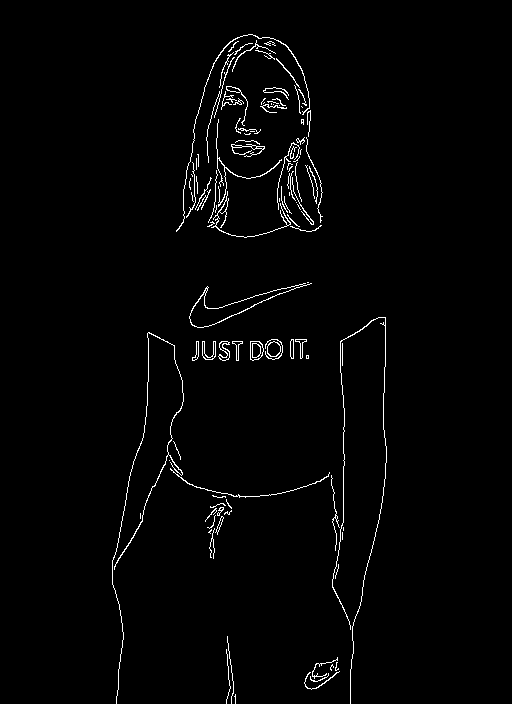

In [50]:
canny_image = load_image("C:/Users/tabatabaei/Desktop/canny test data/image/06648_00.jpg")#.resize(new_size)

canny = controlnet_condition(
    canny_image, 
    "canny"
)
canny

In [64]:
text_prompt = "a woman wearing a white shirt"

  0%|          | 0/20 [00:00<?, ?it/s]

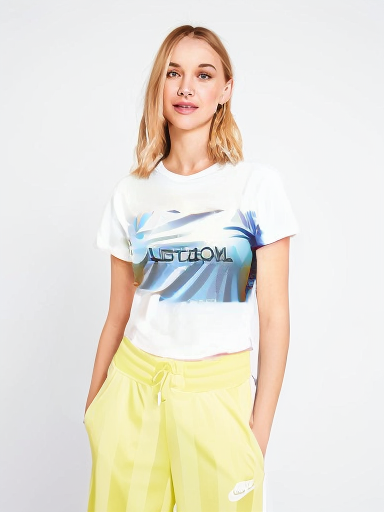

In [65]:
generator = torch.manual_seed(8)

generated_image = base_pipe(
    text_prompt,
    image=image,
    mask_image=mask_image,
    control_image=canny,
    num_inference_steps=20,
    generator=generator,
    controlnet_conditioning_scale = 0.9,
    width=384, height=512
).images[0]

generated_image